# Data Exploration for Starbucks Capstone Project#

The objective of this Python notebook is to explore the data from the main sources of data for the Starbucks Capstone Project. In this data exploration, three data sources will be evaluated:
    1. portfolio.json - This dataset contains the users of rewards programs for Starbucks. It contains information like the age, gender, income, and date of becoming a member of the program.
    2. transcript.json - This dataset contains the data of offers sent during a 30-day test period. It contains information of rewards, channels, difficulty, duration, and offer type.
    3. profile.json - This dataset contains the information of the events. In this case, the event is referred to what happened to the offers. The offers could be received, viewed, a transaction could be made, and the offer could be completed.
As a part of the exploration of the data, I will be looking for null data and duplicates within the datasets. Also, I will be creating some tables where we can identify trends in data. Additionally, I will be creating a couple of graphs in order to see how the data is distributed.




In [1]:
# We start importing some useful libraries
import pandas as pd
import numpy as np
import math
import json
from matplotlib import pyplot as plt
%matplotlib inline
import os
from sklearn.preprocessing import robust_scale, scale
import seaborn as sns
import ast

In [2]:
# read in the json files
portfolio = pd.read_json(os.path.join('data', 'portfolio.json'), orient='records', lines=True)
transcript = pd.read_json(os.path.join('data', 'transcript.json'), orient='records', lines=True)
profile = pd.read_json(os.path.join('data', 'profile.json'), orient='records', lines=True)

## Portfolio Dataset

We start viewing how the portfolio dataset is structured.

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


We also have to take in account the dimensions of the dataset (how many rows and columns the dataset contains).

In [4]:
# Data dimensions for the portfolio dataset
portfolio.shape

(10, 6)

It is needed to know if there are nulls within our dataset.

In [5]:
# Quantity of nulls within the portfolio dataset
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

We look for duplicated data within the dataset.

In [6]:
portfolio.columns.duplicated().sum()

0

We look for some descriptive stats of our dataset (just numeric variables).

In [7]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


It is important to look for the scales of the numeric values.

Text(0.5, 0, 'Actual value')

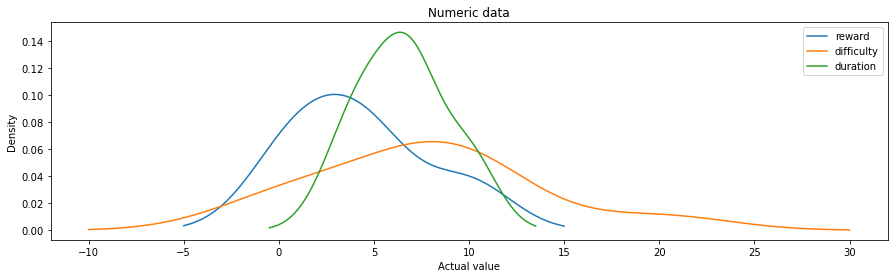

In [8]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars = portfolio[['reward','difficulty','duration']]
num_vars.plot.density(ax=axs)
axs.set_title('Numeric data')
axs.set_xlabel('Actual value')

It is shown that there is a need of scaling in the numeric values.

## Transcript Dataset

We start viewing how the transcript dataset is structured.

In [9]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


We also have to take in account the dimensions of the dataset (how many rows and columns the dataset contains).

In [10]:
transcript.shape

(306534, 4)

It is needed to know if there are nulls within our dataset.

In [11]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

We look for duplicated data within the dataset.

In [12]:
transcript.columns.duplicated().sum()

0

We don't see stats for numeric variables in transcript because it does not contain useful data to describe.

## Profile dataset

Structure of the profile dataset:

In [13]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


Dimensions of the profile dataset:

In [14]:
profile.shape

(17000, 5)

Looking if there are duplicated IDs within the profile dataset.

In [15]:
len(profile['id'].unique())

17000

It is needed to know if there are nulls within our dataset.

In [16]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

As we see in the output, there are 2175 nulls for the gender variable and the income variable. The question here is: are the nulls of both variables within the same observations?

We have to evaluate it, in order to know what to do with this profiles.

In [17]:
sum((profile.gender.isna())&(profile.income.isna()))

2175

This output shows that both set of nulls are within the same 2175 profiles.

We look for duplicated data within the dataset.

In [18]:
profile.columns.duplicated().sum()

0

We look for some descriptive stats of our dataset (just numeric variables).

In [19]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


No handles with labels found to put in legend.


(array([   0.,  205., 1369., 1526., 2309., 3541., 2991., 1782.,  831.,
         254.,   17., 2175.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <BarContainer object of 12 artists>)

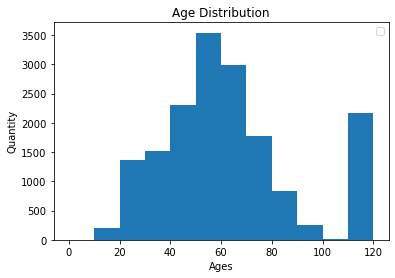

In [20]:
from matplotlib import pyplot as plt
hist = plt.hist(profile.age, bins = [0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.title("Age Distribution")
plt.legend()
plt.xlabel('Ages')
plt.ylabel('Quantity')

hist

As we can see in the output, there are some registers that their age is 118 years. It looks like they are outliers, because the age is too high compared to the rest of the values distributed within the dataset.

In [21]:
sum(profile.age == 118)

2175

The output shows that there are 2175 profiles that have an extreme value (118 years). Are those 2175 profiles the same that have missing values in gender and income?

In [22]:
sum((profile.gender.isna())&(profile.income.isna())&(profile.age == 118))

2175

The result shows that those 2175 profiles have to be dropped from the dataset, as they contain all the missing values and outliers in the dataset.

# Data Preprocessing

The datasets that need some changes are the **Profile Dataset**, and the **Portfolio Dataset**. It contains some missing values, some outliers, and some variables with a wrong format. In this part, we will try to prepare the data in order to get it ready for running the models. Apart from working with the issues mentioned before, we will normalize the numeric values for some variables.

## Portfolio Dataset

Here, it is only needed to scale the numeric variables to get more standard results.

Text(0.5, 0, 'New value')

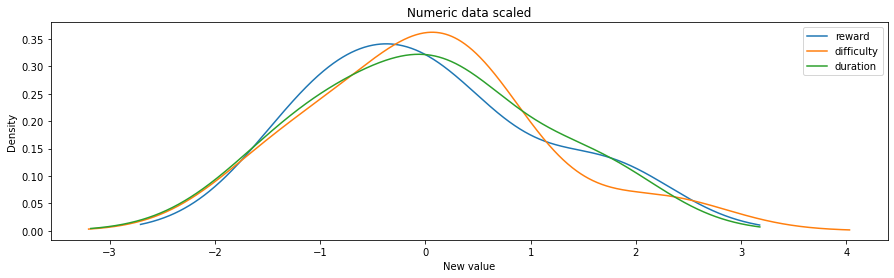

In [23]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars = pd.DataFrame(scale(num_vars), columns=num_vars.columns, index=num_vars.index)
num_vars.plot.density(ax=axs)
axs.set_title('Numeric data scaled')
axs.set_xlabel('New value')

Now it looks like there is the same scale for the three variables.

## Profile Dataset

The first preprocessing data will be converting the "became_member_on" variable into a date format variable named "member_since".

In [24]:
profile['member_since'] = pd.to_datetime(profile['became_member_on'].astype('str')).dt.date
profile

,gender,age,id,became_member_on,income,member_since
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,2017-02-12
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,2017-07-15
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,2018-07-12
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,2017-05-09
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,2017-08-04
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,2018-06-04
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,2018-07-13
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,2017-01-26
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,2016-03-07


Here, we can see that the "member_since" variable takes a date format. Now we have to drop the "became_member_on" variable.

In [25]:
profile.drop('became_member_on', 1, inplace=True)
profile

,gender,age,id,income,member_since
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017-02-12
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018-07-12
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,2017-08-04
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018-06-04
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018-07-13
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017-01-26
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016-03-07


Dropping the nulls:

In [26]:
profile = profile.loc[profile['gender'].isnull() == False]
profile

,gender,age,id,income,member_since
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018-06-04
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018-07-13
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017-01-26
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016-03-07


After dropping the values, we analyze the data without the dropped values:

In [27]:
profile.describe()

,age,income
count,14825.000000,14825.000000
mean,54.393524,65404.991568
std,17.383705,21598.299410
min,18.000000,30000.000000
25%,42.000000,49000.000000
50%,55.000000,64000.000000
75%,66.000000,80000.000000
max,101.000000,120000.000000


Text(0.5, 0, 'Actual value')

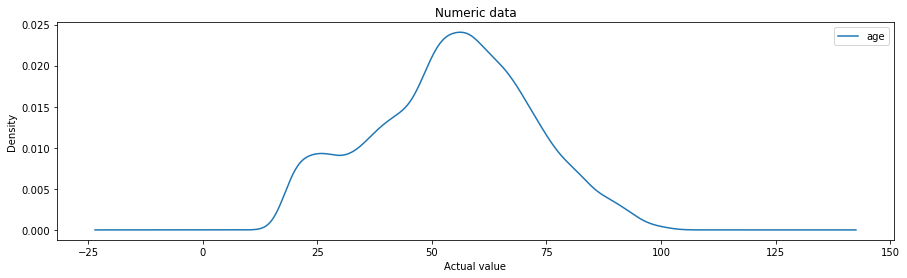

In [28]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars2 = profile[['age']]
num_vars2.plot.density(ax=axs)
axs.set_title('Numeric data')
axs.set_xlabel('Actual value')

Text(0.5, 0, 'New value')

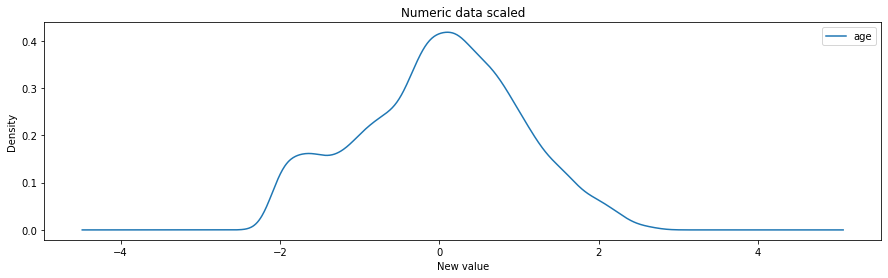

In [29]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars2 = pd.DataFrame(scale(num_vars2), columns=num_vars2.columns, index=num_vars2.index)
num_vars2.plot.density(ax=axs)
axs.set_title('Numeric data scaled')
axs.set_xlabel('New value')

Text(0.5, 0, 'Actual value')

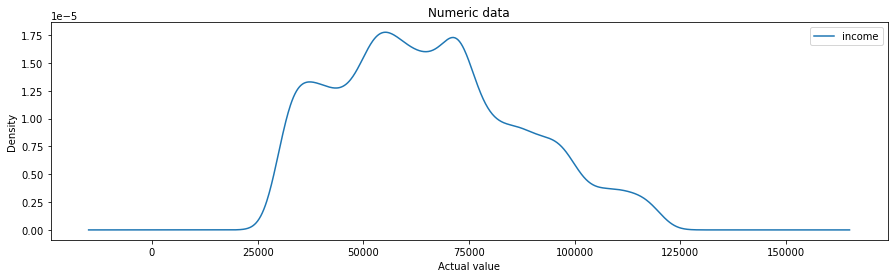

In [30]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars3 = profile[['income']]
num_vars3.plot.density(ax=axs)
axs.set_title('Numeric data')
axs.set_xlabel('Actual value')

Text(0.5, 0, 'New value')

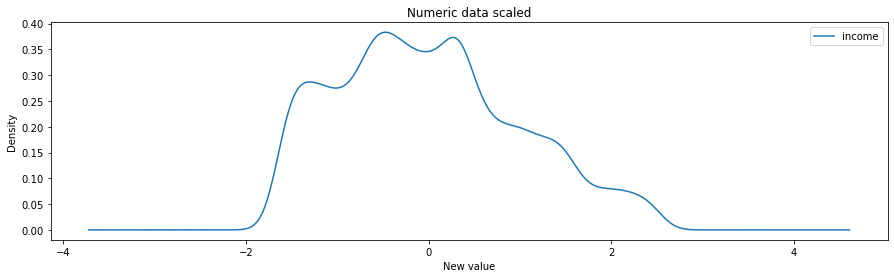

In [31]:
fig, axs = plt.subplots(figsize=(15,4), nrows=1, ncols=1)

num_vars3 = pd.DataFrame(scale(num_vars3), columns=num_vars3.columns, index=num_vars3.index)
num_vars3.plot.density(ax=axs)
axs.set_title('Numeric data scaled')
axs.set_xlabel('New value')

## Transcript Dataset

In [32]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


We can see that the "value" variable contains two separate values within the same field. It means that we have to separate them.

In [33]:
for col_name in ['amount', 'reward']:
    transcript[col_name] = transcript['value'].apply(lambda x: x[col_name] if col_name in x else None)
    
transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer_id'] if 'offer_id' in x \
                                                   else (x['offer id'] if 'offer id' in x else None))

In [34]:
transcript

,person,event,value,time,amount,reward,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.59,NaN,None
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53,NaN,None
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61,NaN,None
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.53,NaN,None


In [35]:
transcript.drop('value', 1, inplace=True)

In [36]:
transcript

,person,event,time,amount,reward,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,None
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,None
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,None
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,None


Then we group the transcript dataset by customer.

In [37]:
customers = transcript.groupby('person')['time'].count()
customers.sort_values(ascending=False)

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
                                    ..
22617705eec442e0b7b43e5c5f56fb17     2
df9fc9a86ca84ef5aedde8925d5838ba     2
3a4e53046c544134bb1e7782248631d1     2
e63e42480aae4ede9f07cac49c8c3f78     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: time, Length: 17000, dtype: int64

In [38]:
customers.describe()

count    17000.000000
mean        18.031412
std          6.849595
min          1.000000
25%         13.000000
50%         17.000000
75%         23.000000
max         51.000000
Name: time, dtype: float64

In [39]:
journey = transcript.loc[transcript['person'] == customers.index[0]]
journey

,person,event,time,amount,reward,offer_id
55972,0009655768c64bdeb2e877511632db8f,offer received,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837
89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16,NaN,None
113605,0009655768c64bdeb2e877511632db8f,offer received,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed
153401,0009655768c64bdeb2e877511632db8f,offer received,408,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
168412,0009655768c64bdeb2e877511632db8f,transaction,414,8.57,NaN,None
168413,0009655768c64bdeb2e877511632db8f,offer completed,414,NaN,5.0,f19421c1d4aa40978ebb69ca19b0e20d
187554,0009655768c64bdeb2e877511632db8f,offer viewed,456,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
204340,0009655768c64bdeb2e877511632db8f,offer received,504,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4


In [40]:
event_person = transcript.groupby(['person','event'])['time'].count()
event_person

person                            event          
0009655768c64bdeb2e877511632db8f  offer completed     3
                                  offer received      5
                                  offer viewed        4
                                  transaction         8
00116118485d4dfda04fdbaba9a87b5c  offer received      2
                                                     ..
fffad4f4828548d1b5583907f2e9906b  transaction        12
ffff82501cea40309d5fdd7edcca4a07  offer completed     6
                                  offer received      6
                                  offer viewed        6
                                  transaction        15
Name: time, Length: 63180, dtype: int64

In [41]:
received_and_viewed = pd.merge(transcript.loc[transcript['event'] == 'offer received', ['person', 'offer_id', 'time']],
                 transcript.loc[transcript['event'] == 'offer viewed', ['person', 'offer_id', 'time']],
                 on=['person', 'offer_id'], how='left', suffixes=['_received', '_viewed'])
received_and_viewed

,person,offer_id,time_received,time_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6.0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6.0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,624.0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12.0
...,...,...,...,...
95316,d087c473b4d247ccb0abfef59ba12b0e,ae264e3637204a6fb9bb56bc8210ddfd,576,672.0
95317,cb23b66c56f64b109d673d5e56574529,2906b810c7d4411798c6938adc9daaa5,576,NaN
95318,6d5f3a774f3d4714ab0c092238f3a1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,576,588.0
95319,9dc1421481194dcd9400aec7c9ae6366,ae264e3637204a6fb9bb56bc8210ddfd,576,624.0


In [42]:
received_and_viewed = received_and_viewed.loc[(received_and_viewed['time_viewed'] >= received_and_viewed['time_received']) | 
                                                  (received_and_viewed['time_viewed'].isnull())]
# Concatenating the nulls in viewed.
received_and_viewed = pd.concat((received_and_viewed.groupby(['person', 'offer_id', 'time_viewed'])
                               .agg({'time_received': 'max'}).reset_index(),received_and_viewed.loc[received_and_viewed['time_viewed'].isnull()]),
                  axis=0, sort=True)

received_and_viewed.head()

,offer_id,person,time_received,time_viewed
0,3f207df678b143eea3cee63160fa8bed,0009655768c64bdeb2e877511632db8f,336,372.0
1,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,168,192.0
2,f19421c1d4aa40978ebb69ca19b0e20d,0009655768c64bdeb2e877511632db8f,408,456.0
3,fafdcd668e3743c1bb461111dcafc2a4,0009655768c64bdeb2e877511632db8f,504,540.0
4,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,168,216.0


In [43]:
offercompleted = pd.merge(received_and_viewed, transcript.loc[transcript['event'] == 'offer completed', ['person', 'offer_id', 'time', 'reward']],
                on=['person', 'offer_id'], how='left').rename(columns={'time': 'time_completed'})


offercompleted.loc[(offercompleted['time_viewed'].isnull()) | (offercompleted['time_viewed'] > offercompleted['time_completed']), 
                    ['time_completed', 'reward']] = (np.nan, np.nan)
offercompleted.drop_duplicates(inplace=True)
offercompleted = pd.concat(
    (offercompleted.groupby(['person', 'offer_id', 'time_completed', 'reward']).agg({'time_viewed': 'max', 'time_received': 'max'}).reset_index(),
     offercompleted.loc[offercompleted['time_completed'].isnull()]), axis=0, sort=True)

offercompleted.head()

,offer_id,person,reward,time_completed,time_received,time_viewed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,408,432.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,3.0,252.0,168,186.0
2,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,504,516.0
3,4d5c57ea9a6940dd891ad53e9dbe8da0,0020c2b971eb4e9188eac86d93036a77,10.0,510.0,408,426.0
4,fafdcd668e3743c1bb461111dcafc2a4,0020c2b971eb4e9188eac86d93036a77,2.0,54.0,0,12.0


In [44]:
customerfunnel = pd.merge(offercompleted, transcript.loc[transcript['event'] == 'transaction', 
                ['person', 'time', 'amount']], left_on=['person', 'time_completed'], right_on=['person', 'time'],
                how='outer').rename(columns={'time': 'time_transaction'})
customerfunnel

,offer_id,person,reward,time_completed,time_received,time_viewed,time_transaction,amount
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,408.0,432.0,576.0,22.05
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,5.0,576.0,504.0,516.0,576.0,22.05
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,3.0,252.0,168.0,186.0,252.0,11.93
3,4d5c57ea9a6940dd891ad53e9dbe8da0,0020c2b971eb4e9188eac86d93036a77,10.0,510.0,408.0,426.0,510.0,17.24
4,fafdcd668e3743c1bb461111dcafc2a4,0020c2b971eb4e9188eac86d93036a77,2.0,510.0,0.0,12.0,510.0,17.24
...,...,...,...,...,...,...,...,...
192091,NaN,b3a1272bc9904337b331bf348c3e8c17,NaN,NaN,NaN,NaN,714.0,1.59
192092,NaN,68213b08d99a4ae1b0dcb72aebd9aa35,NaN,NaN,NaN,NaN,714.0,9.53
192093,NaN,a00058cf10334a308c68e7631c529907,NaN,NaN,NaN,NaN,714.0,3.61
192094,NaN,76ddbd6576844afe811f1a3c0fbb5bec,NaN,NaN,NaN,NaN,714.0,3.53


In [45]:
customerfunnel['time'] = customerfunnel['time_received']
customerfunnel.loc[customerfunnel['time'].isnull(), 'time'] = customerfunnel['time_transaction']

In [46]:
customerfunnel.sort_values(['person', 'offer_id', 'time', 'time_completed'], inplace=True)
#dropping duplicates
customerfunnel = customerfunnel.drop_duplicates(['person', 'offer_id', 'time'])

customerfunnel = customerfunnel[['person', 'offer_id', 'time', 'time_received', 'time_viewed', 'time_completed',
                                 'time_transaction', 'amount', 'reward']]
customerfunnel.head()

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward
24618,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN
24614,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN
24615,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN
24616,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN
24617,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN


Merging the portfolio dataset in order to get a complete dataset

In [47]:
complete_df = pd.merge(customerfunnel,portfolio.rename(columns={'reward': 'portfolio_reward', 'id': 'offer_id'}), 
                               on='offer_id', how='left')
complete_df.shape

(188234, 14)

In [48]:
complete_df = pd.merge(complete_df,profile.rename(columns={'id': 'person'}),how='inner', on='person')
complete_df

,person,offer_id,time,time_received,time_viewed,time_completed,time_transaction,amount,reward,portfolio_reward,channels,difficulty,duration,offer_type,gender,age,income,member_since
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,NaN,NaN,NaN,NaN,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount,M,33,72000.0,2017-04-21
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,336.0,372.0,NaN,NaN,NaN,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational,M,33,72000.0,2017-04-21
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,192.0,NaN,NaN,NaN,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational,M,33,72000.0,2017-04-21
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,456.0,NaN,NaN,NaN,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,33,72000.0,2017-04-21
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,540.0,NaN,NaN,NaN,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount,M,33,72000.0,2017-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164833,ffff82501cea40309d5fdd7edcca4a07,NaN,312.0,NaN,NaN,NaN,312.0,16.86,NaN,NaN,NaN,NaN,NaN,NaN,F,45,62000.0,2016-11-25
164834,ffff82501cea40309d5fdd7edcca4a07,NaN,498.0,NaN,NaN,NaN,498.0,13.17,NaN,NaN,NaN,NaN,NaN,NaN,F,45,62000.0,2016-11-25
164835,ffff82501cea40309d5fdd7edcca4a07,NaN,504.0,NaN,NaN,NaN,504.0,7.79,NaN,NaN,NaN,NaN,NaN,NaN,F,45,62000.0,2016-11-25
164836,ffff82501cea40309d5fdd7edcca4a07,NaN,606.0,NaN,NaN,NaN,606.0,10.12,NaN,NaN,NaN,NaN,NaN,NaN,F,45,62000.0,2016-11-25


In [49]:
#filling missing values in offer_type
complete_df['offer_type'].fillna('transaction', inplace=True)
complete_df.sort_values(['person', 'time', 'offer_id'], inplace=True)
complete_df.shape

(164838, 18)

In [50]:
complete_df.to_csv('./data/customer_funnel.csv', index=False)